# СДУ
# Лабораторная работа





**Выполнил**: *здесь впишите свои фамилию и имя*

---

<span style="color:red">Очень важно, чтобы ноутбук запускался по порядку от первой до последней ячейки без ошибок, проверьте это перед отправкой. Для этого достаточно перезапустить ядро и выполнить все ячейки.</span>

Иначе --- 0 баллов за всю работу.

**Важные замечания:**
1. Максимум, который можно получить -- 8 баллов. А номеров на целые 10.
2. Кроме самих заданий, я оцениваю оформление кода по шкале от -0.5 до +0.5 балла. Чтобы получить максимальный балл, соблюдайте обычные правила для создания красивого кода: хорошие имена переменных, функций, отступы. Приветствуются docstrings в функциях.
3. По возможности используйте numpy и векторизацию.
4. Итого вы можете набрать до 10.5 баллов, но в зачет идет не более 8 балоов. Есть резерв.
5. Код списан у соседа -- это очень плохо, это меня расстраивает, а это хуже, чем ноль баллов (гарантирую).
6. По всем вопросам нужно смело и активно писать в канал в Telegram.

In [ ]:
# some imports, you may add what you please
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Please do not change the seed and these parameters
np.random.seed(42)
T = 3                   ####### Время изменил на 3, а то слишком большой масштаб
b = 1
sigma = 5

n_steps = 100

**№1 (1 б)** Напишите функцию, которая по числу траекторий, числу узлов и длине временного отрезка $T$ выводит массив numpy с винеровскими траекториями на $[0, T]$.

In [ ]:
def Wiener_Paths(n_paths: int, n_steps: int, T: float):
  dt = T/n_steps
  #random = np.random.default_rng(seed)
  np.random.seed(42)

  norm = np.sqrt(dt) * np.random.randn(n_steps - 1, n_paths)
  norm = np.concatenate((np.full((1, n_paths), 0), norm), axis=0)

  return (np.cumsum(norm, axis=0)).T


**№2 (0.5 б)** Выведите свои винеровские траектории на экран вместе с графиком $y = \pm  \sqrt{3x}$. Выведите первые 100 траекторий, если ваше число траекторий $N > 100$.

In [ ]:
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle') # Устанавливаем стиль

In [ ]:
def Plt_Wiener(n_paths: int, n_steps: int, T: float):
  if n_paths > 100:
    n_paths = 100

  paths_n = Wiener_Paths(n_paths, n_steps, T)
  t = np.linspace(0, T, n_steps)

  y = lambda x: np.sqrt(3 * x)

  _, ax = plt.subplots(figsize=(15, 5), dpi=150)
  ax.plot(t, paths_n.T)
  ax.plot(t, y(t), color = 'black', linestyle = 'dashed' , label='-+ sqrt(3x)')
  ax.plot(t, -y(t), color = 'black', linestyle = 'dashed')
  ax.set_xlabel("Time")
  ax.set_ylabel("Value")
  ax.set_title("Wiener trajectories")
  plt.legend(prop={'size': 13})
  plt.show()


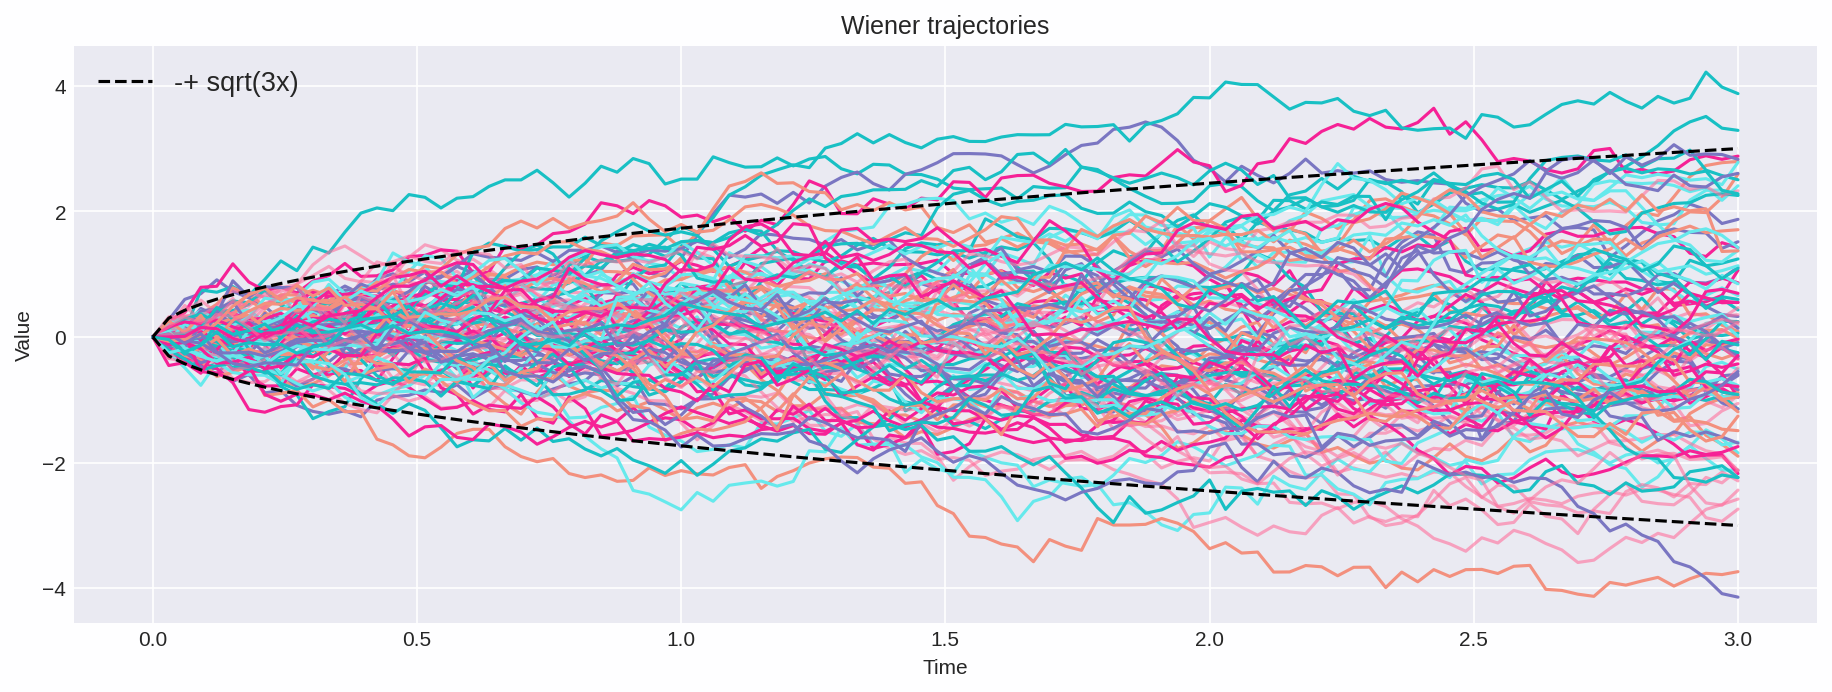

In [ ]:
Plt_Wiener(100, n_steps, T) # 100 траекторий, 100 - узлов,

**№3 (1 б)** Напишите функцию, которая получает на вход массив винероских траекторий и параметры $b$,  $\sigma$ и $T$ и выводит в качестве ответа массив траекторий
$$
X_t = e^{(b - σ^2/2)t + σ W_t}.
$$

In [ ]:
def Geometric_Wiener(Wiener: np.array, b: float, sigma: float, T: float):
  n_paths, n_steps = np.shape(Wiener)
  dt = T / n_steps

  t = np.linspace(0, T, n_steps)
  np.reshape(t, (1, n_steps))

  return np.exp((b - 0.5 * sigma**2) * t + sigma * Wiener)


**№4 (0.5 б)** Нарисуйте 100 траекторий процессов выше на графике.

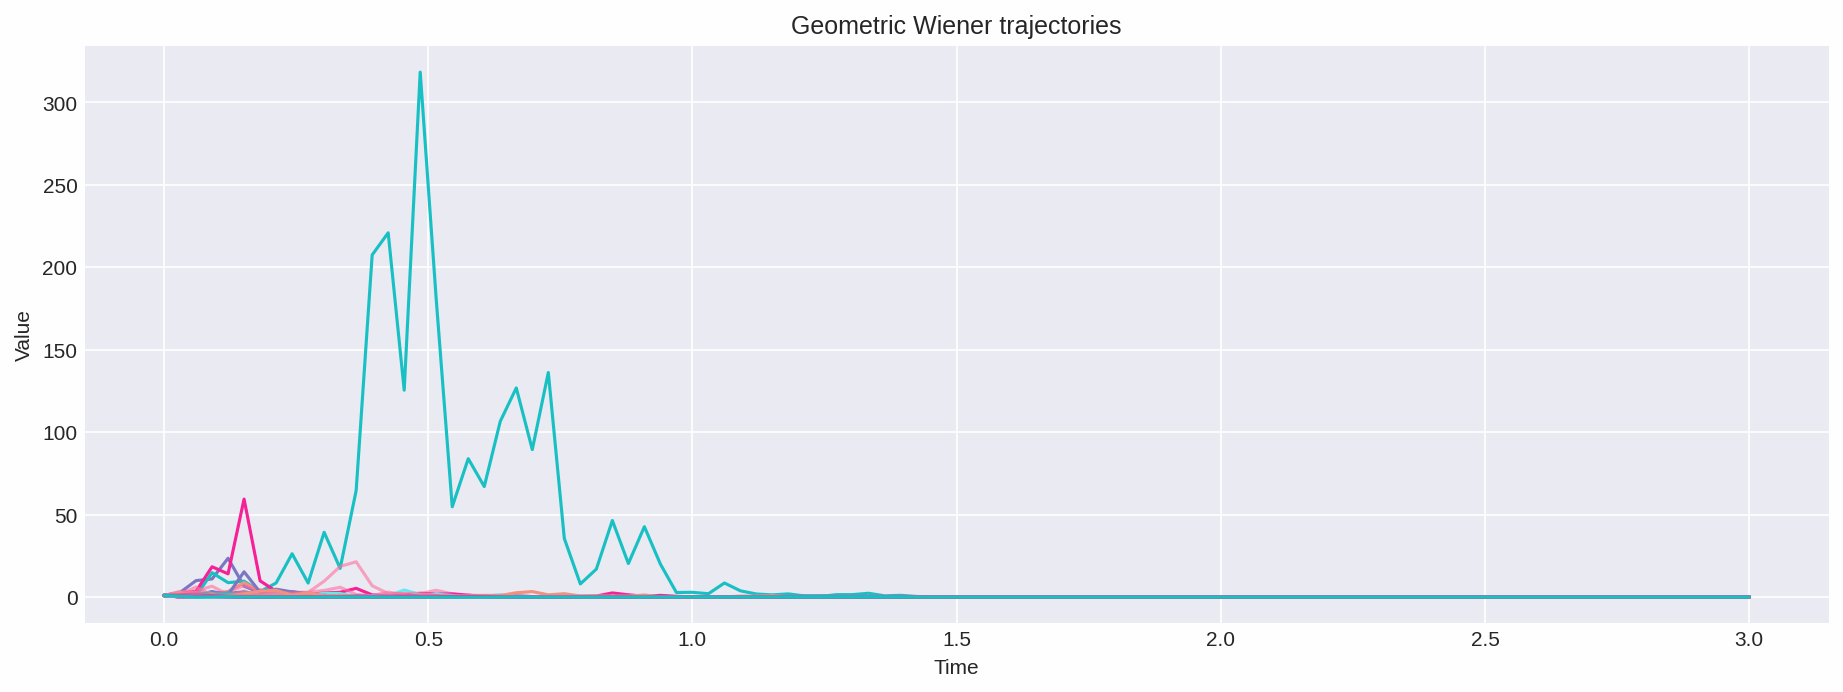

In [ ]:
Wiener_n = Wiener_Paths(100, n_steps, T)
paths_n = Geometric_Wiener(Wiener_n, b, sigma, T)
t = np.linspace(0, T, 100)



_, ax = plt.subplots(figsize=(15, 5), dpi=150)
ax.plot(t, paths_n.T)

ax.set_xlabel("Time")
ax.set_ylabel("Value")
ax.set_title("Geometric Wiener trajectories")
plt.show()

**№5 (3 б)** Напишите функцию, которая вычисляет решение СДУ
$$
dX_t = b X_t dt + \sigma X_t d W_t, \quad X_0 = 1
$$
численно по схеме Эйлера. На вход она получает массив винеровских траекторий, $b$ и $\sigma$, $T$, на выходе --- массив решений, посчитанных схемой Эйлера. Подсказка: посмотрите на функцию cumsum() в numpy.

In [ ]:
def Euler_Scheme_2(Wiener: np.array, b: float, sigma: float, T: float, seed: int = 42):
  n_paths, n_steps = np.shape(Wiener)
  dt = T / n_steps                         # Используем X_(n+1)/X_n = 1 + b * dt + sigma * dW_n

  Wiener_Diff = np.diff(Wiener, axis=-1)

  X_Diff = 1 + b * dt + sigma * Wiener_Diff
  X_Diff = np.insert(X_Diff, 0, np.full((n_paths), 1), axis=1)

  return np.cumprod(X_Diff, axis=1)

**№6 (0.5 б)** Нарисуйте график для 100 получившихся решений.

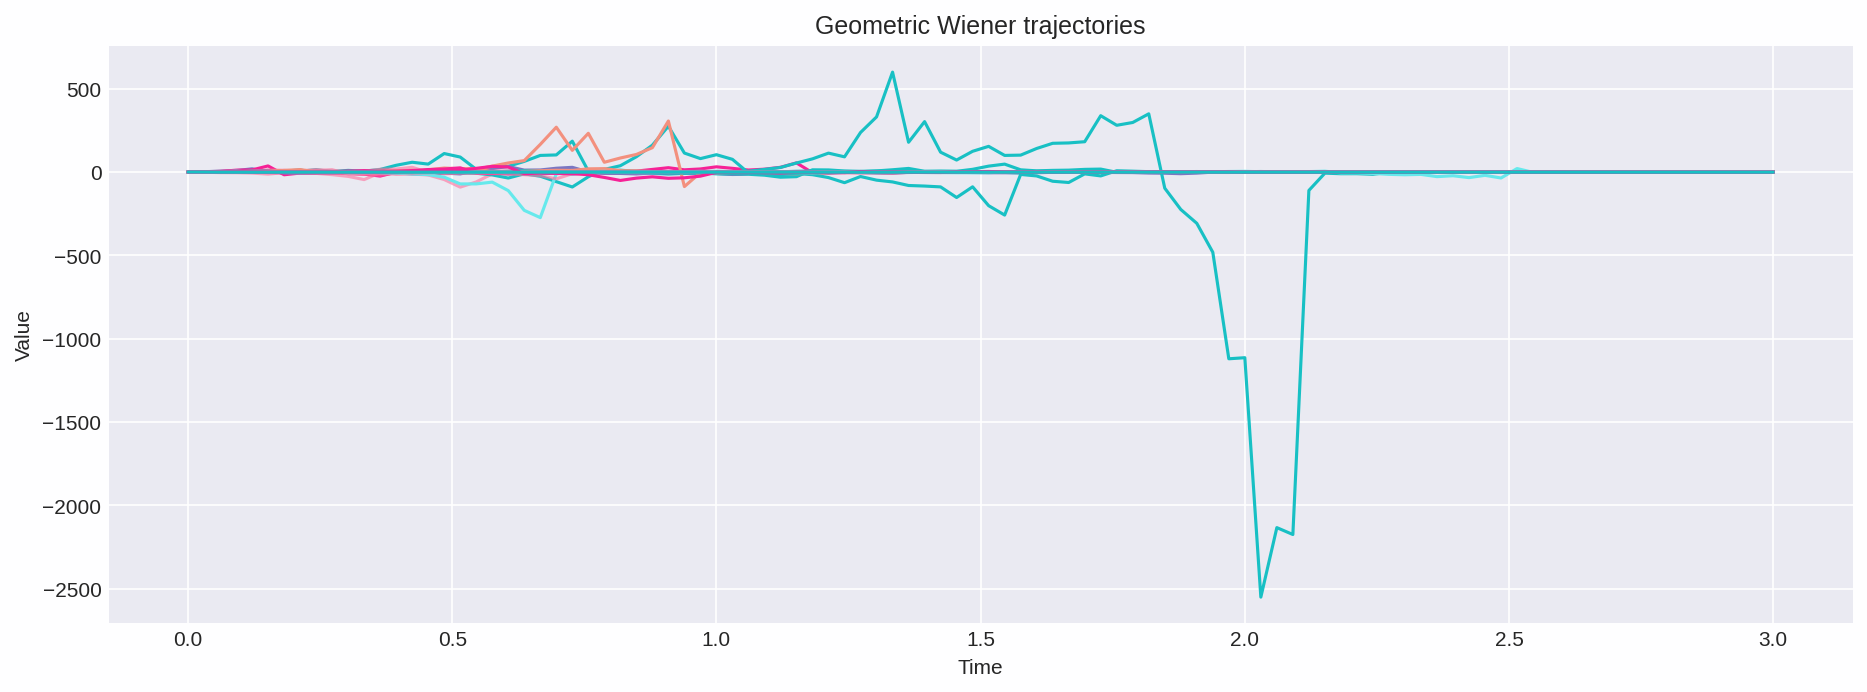

In [ ]:

Wiener_n = Wiener_Paths(100, n_steps, T)
paths_n = Euler_Scheme_2(Wiener_n, b, sigma, T)
t = np.linspace(0, T, 100)



_, ax = plt.subplots(figsize=(15, 5), dpi=150)
ax.plot(t, paths_n.T)

ax.set_xlabel("Time")
ax.set_ylabel("Value")
ax.set_title("Geometric Wiener trajectories")
plt.show()

**№7 (0.5 б)** Зафиксируйте одну винеровскую траекторию и выведите для нее на графике "точную" и "приближенную" траектории решения $X_t$.

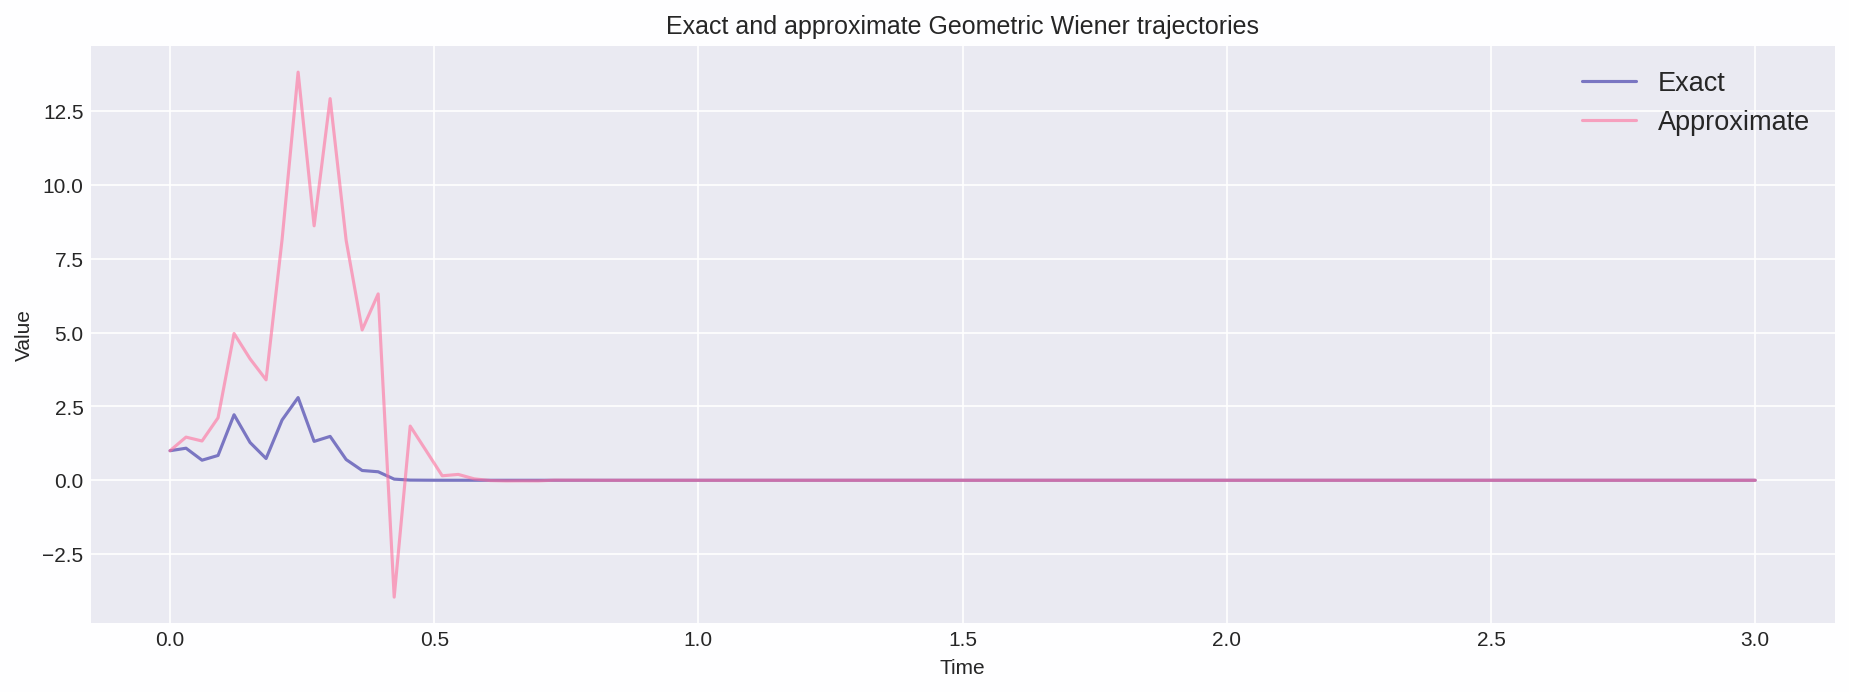

In [ ]:
Wiener_n = Wiener_Paths(1, n_steps, T)
exact_paths_n = Geometric_Wiener(Wiener_n, b, sigma, T)
approximate_paths_n = Euler_Scheme_2(Wiener_n, b, sigma, T)
t = np.linspace(0, T, n_steps)



_, ax = plt.subplots(figsize=(15, 5), dpi=150)
ax.plot(t, exact_paths_n.T, label='Exact')
ax.plot(t, approximate_paths_n.T, label='Approximate')

ax.set_xlabel("Time")
ax.set_ylabel("Value")
ax.set_title("Exact and approximate Geometric Wiener trajectories")
plt.legend(prop={'size': 13})
plt.show()

**№8 (3 б)** Оцените среднеквадратическую ошибку
$$
\frac{1}{MN} \sum_{i=1}^N \sum_{j=1}^M | X^{(точное),j}_{t_i} - X^{(приближ), j}_{t_i}|^2,
$$
где $N$ --- число узлов на временной сетке, а $M$ --- число траекторий. Покажите на графике (в двойном логарифмическом масштабе), что при $N \to \infty$ ошибка убывает как $1/\sqrt{N}$.

In [ ]:
def Error( N: np.array, M: int, T: int, b: float, sigma: float):
  err = np.full((N.size), 0.0)
  for i in range(0, N.size):
    Wiener_n = Wiener_Paths(M, N[i], T)
    exact_paths_n = Geometric_Wiener(Wiener_n, b, sigma, T)
    approximate_paths_n = Euler_Scheme_2(Wiener_n, b, sigma, T)
    t = np.linspace(0, T, N[i])


    Diff = (exact_paths_n - approximate_paths_n)**2

    err[i] = np.mean(np.mean(Diff, axis=1), axis=0)

  return err

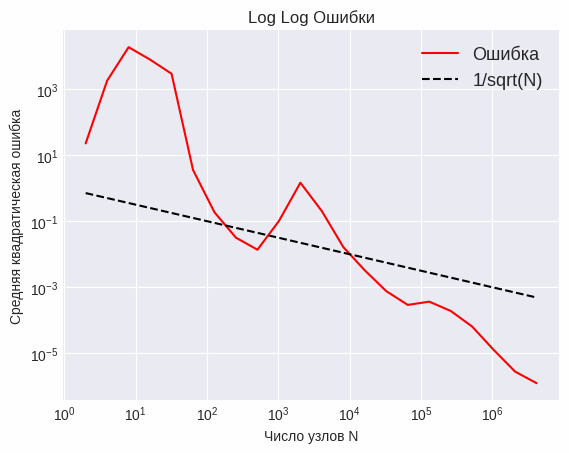

In [ ]:
M = 10


y = lambda x: 1/np.sqrt(x)

x = np.arange(1, 23, 1, dtype=int)
x = np.power(2, x)  # (2, 4, 8, 16, 32, 64, 128, ....)



plt.xscale('log')
plt.yscale('log')

plt.xlabel('Число узлов N')
plt.ylabel('Средняя квадратическая ошибка')
plt.title('Log Log Ошибки')

plt.plot(x, Error(x, M, T, b, sigma), color = 'red', label = 'Ошибка')
plt.plot(x, y(x),  color = 'black', linestyle = 'dashed', label = '1/sqrt(N)' )
plt.legend(prop={'size': 13})
plt.show()